In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
path = 'Picture1.jpg'

In [42]:
image = cv2.imread(path)
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

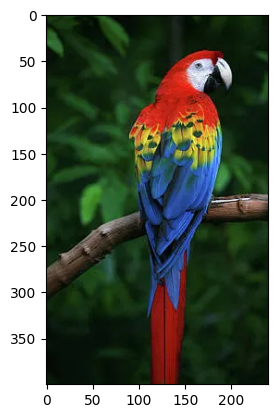

In [43]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

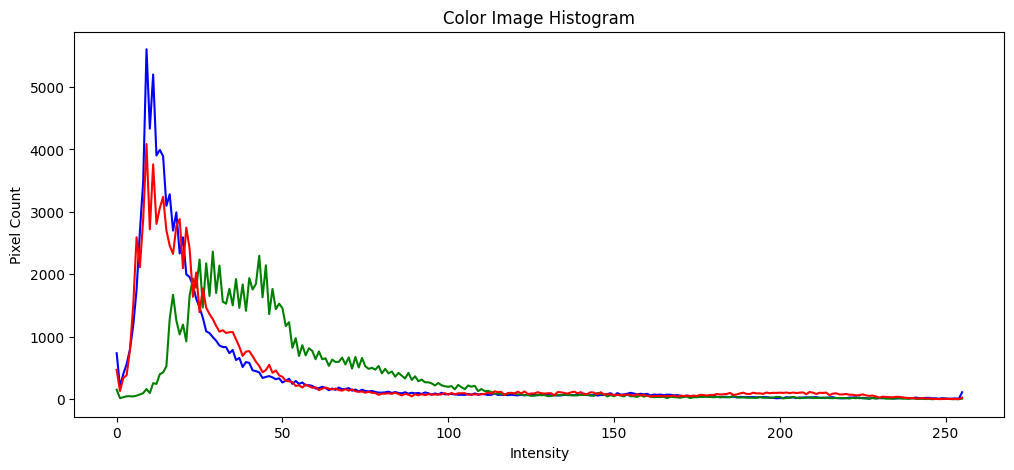

In [44]:
plt.figure(figsize=(12, 5))
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("Color Image Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

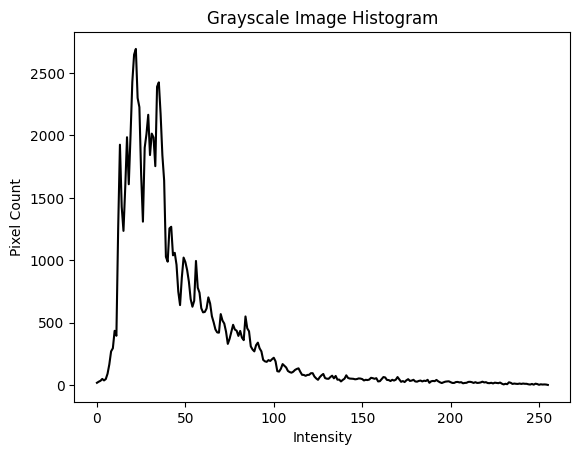

In [45]:
hist_gray = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
plt.plot(hist_gray, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

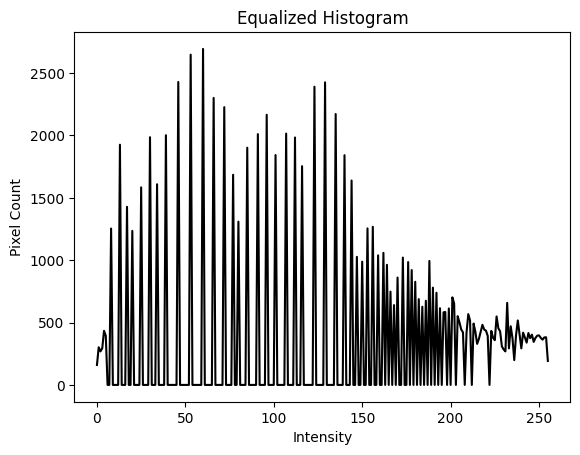

In [46]:
equalized_image = cv2.equalizeHist(grayscale_image)
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
plt.plot(hist_eq, color='black')
plt.title("Equalized Histogram")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

In [47]:
from google.colab.patches import cv2_imshow

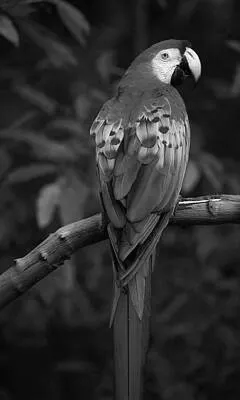

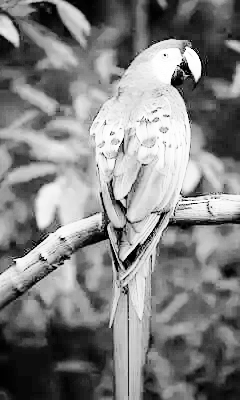

In [48]:
cv2_imshow(grayscale_image)
cv2_imshow(equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
image_gray = cv2.imread(path, 0)
dft = np.fft.fft2(image_gray)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

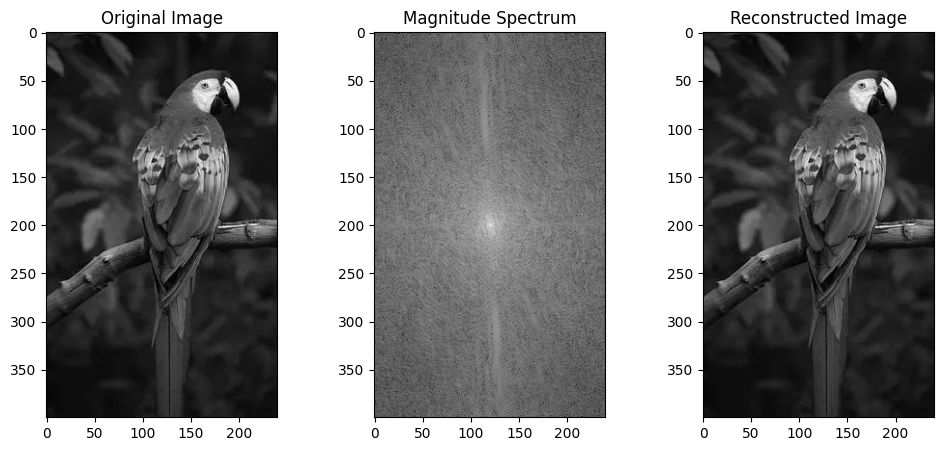

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.show()

In [51]:
angle = 45
(h, w) = image_gray.shape[:2]
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image_gray, matrix, (w, h))

dft_rot = np.fft.fftshift(np.fft.fft2(rotated_image))
magnitude_rot = 20 * np.log(np.abs(dft_rot))

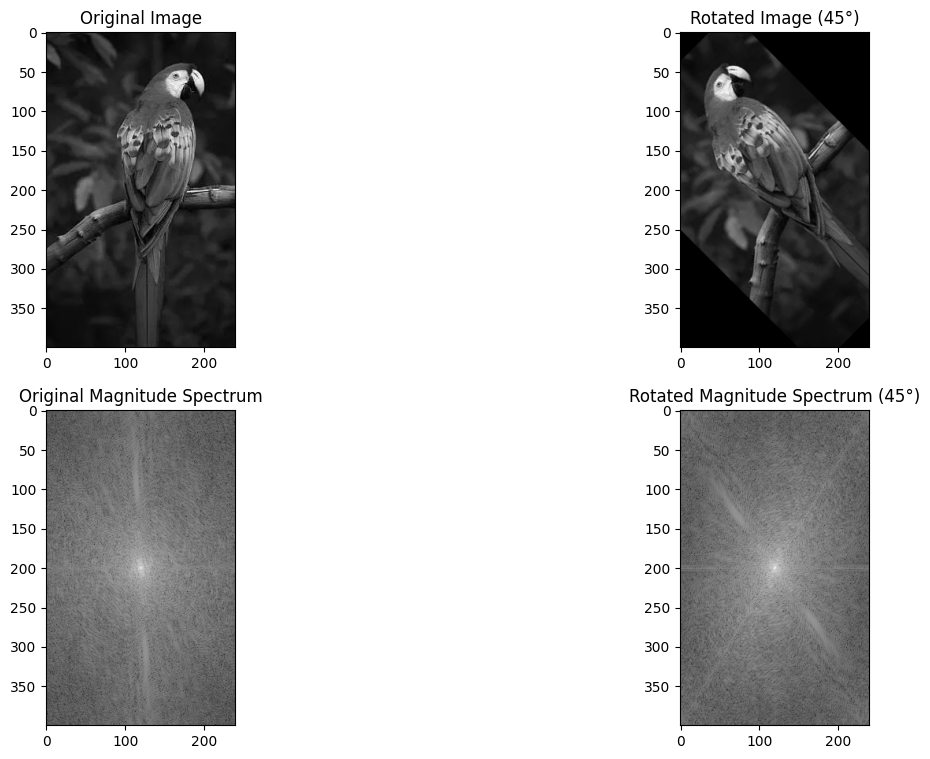

In [52]:
plt.figure(figsize=(15, 9))
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.subplot(2, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title(f"Rotated Image ({angle}°)")
plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Magnitude Spectrum")
plt.subplot(2, 2, 4)
plt.imshow(magnitude_rot, cmap='gray')
plt.title(f"Rotated Magnitude Spectrum ({angle}°)")
plt.show()